# **Download Public Data from URL to Colab**

Downloading or uploading files from a cloud server often provides a higher transfer speed compared to a regular server. Google Drive, for instance, is a popular choice for storing files due to its impressive download speed. However, a common challenge is uploading files directly to Google Drive from the Internet.

In this guide, we'll explore a solution that enables direct uploads to Google Drive from the Internet. The only prerequisites are a Google account and a few lines of code, which we will discuss in the following sections.

### Additional Resources
* **[Original Code Source](https://www.geeksforgeeks.org/download-anything-to-google-drive-using-google-colab/)**

Feel free to explore further and utilize the powerful features of downloading data to Google Colab in your projects. Happy coding!

## Set Up Your Environment

In [1]:
# In a Python 3.x Kernel
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Import requests to download from URL
import requests

# Import geopandas to process and visualize vector data
import geopandas as gpd

# rasterio is not preinstalled in Colab
!pip install rasterio

# Import rasterio, numpy, & matplotlib to process and visualize raster data
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 12.8 MB/s eta 0:00:00


## Download Public Spatial Data

#### **You can play with other download examples by using the [USGS National Map Downloader](https://apps.nationalmap.gov/downloader/)**

Additional collections of websites offering geospatial data:
* [Awesome Geospatial Data Downloads](https://github.com/iamtekson/awesome-geospatial-data-download-sites)
* [Free GIS Data](https://freegisdata.rtwilson.com/)

In [2]:
# Downloading Vector Data

file_url = "https://data.gov.au/data/dataset/f91c2ffd-a0a0-4042-a8ac-71757a6ef727/resource/d3f3b6d3-927c-49fe-a905-9166a501c852/download/201920-fy-bushfire-boundaries.zip"

r = requests.get(file_url, stream = True)
with open("/content/FY_Bushfire_Boundary_AUS.zip", "wb") as file:
	for block in r.iter_content(chunk_size = 1024):
		if block:
			file.write(block)

!unzip "/content/FY_Bushfire_Boundary_AUS.zip"

Archive:  /content/FY_Bushfire_Boundary_AUS.zip
 extracting: FY2019_2020_Bushfire_Boundaries.cpg  
  inflating: FY2019_2020_Bushfire_Boundaries.dbf  
  inflating: FY2019_2020_Bushfire_Boundaries.prj  
  inflating: FY2019_2020_Bushfire_Boundaries.qpj  
  inflating: FY2019_2020_Bushfire_Boundaries.shp  
  inflating: FY2019_2020_Bushfire_Boundaries.shx  


In [3]:
# Downloading Raster Data

file_url = "https://prd-tnm.s3.amazonaws.com/StagedProducts/NAIP/ma_2016/42071/m_4207142_se_19_h_20160803_20160928.jp2"

r = requests.get(file_url, stream = True)
with open("/content/NAIP_Worcester.jp2", "wb") as file:
	for block in r.iter_content(chunk_size = 1024):
		if block:
			file.write(block)

## Inspect Your Downloads

In [4]:
# Inspecting and Visualizing Vector Download

# Read in some sample vector data (polygons) from Los Angeles, CA
# You may have a different file path
data = gpd.read_file('/content/FY2019_2020_Bushfire_Boundaries.shp')

# Print a preview of the data, attributes, and data types
print(data.head())

# Print out the coordinate reference system
print(data.crs)

# Plot the data as simply as possible to visualize it
data.plot()

KeyboardInterrupt: 

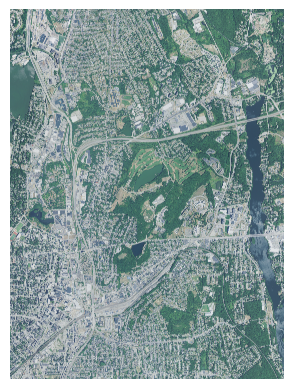

In [ ]:
# Visualizing Raster Download

# Visualize RGB (or NRG) stack
with rasterio.open("/content/drive/MyDrive/NAIP_Worcester.jp2") as src:
    # Read the RGB bands
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)

    # Stack bands together as a single numpy array
    rgb = np.stack((r, g, b), axis=-1)

    # Show the RGB image
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()